# Prueba - Machine Learning - Desafío 1

Nombre: **Verónica Martínez**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Generación **G4**

Profesor: Josué Fredes

## Objetivo
Implementar los contenidos aprendidos a lo largo del módulo.

**Consideraciones Generales**: La prueba debe desarrollarse en consideración a los siguientes puntos:
- Una sección llamada **Preliminares** donde se realiza la descripción del problema y objetivos, así como explicar cómo implementarán su solución. Debe considerar qué criterios de optimización y métricas de desempeño.
- Una sección llamada **Aspectos computacionales** donde se describirán las librerías y módulos a implementar, así como las funciones generadas y su objetivo.
- Una sección llamada **Análisis Exploratorio** donde se generará un análisis descriptivo considerando el tipo de variables (desde el punto de vista estadístico así como computacional).  
Esta sección debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento (datos perdidos, recodificaciones).
- Una sección llamada **Feature Engineering** donde se declarará todas las recodificaciones y transformaciones a realizar.
- Una sección llamada **Modelación**, donde se implementará una solución analítica que aumente las métricas de desempeño. Se solicitan por lo menos 5 modelos predictivos. Cada modelo predictivo debe tener una reseña sobre el por qué se diseño de esa forma.

**Puntuación y corrección**:
- Cada hito equivaldrá a 5 puntos de un total de 20.
- Para aprobar, se requiere un puntaje igual o superior a 16 puntos.

<a name="indice"></a>

## Índice de contenidos
* [Desafío 1: Análisis de Sentimientos de Twitter](#item1)
* [Objetivos](#item2)
* [Hito 1: Sesión Presencial 1](#item3)
  * [Preliminares](#preliminares)
  * [Aspectos Computacionales](#aspectos_computacionales)
* [Hito 1: Sesión Presencial 2](#item4)
  * [Análisis Exploratorio](#exploratorio)
  * [Preprocesamiento](#feature)  
* [Hito 3: M](#item4)
* [Hito 4: M](#item5)
* [Agradecimientos](#item6)

<a name="item1"></a>
## Desafío 1: Análisis de Sentimientos de Twitter
A continuación se presenta un problema clásico en el análisis de texto: *Extraer el sentimiento asociado a un texto*.  

Para esto, utilizaremos una base de datos provenientes de *CrowdFlower*.  

Para descargar los datos puede ejecutar el siguiente código:  
wget https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv

El objetivo general de esta prueba es alcanzar el mejor desempeño posible para clasificar si un tweet es positivo o negativo.  

Para medir el desempeño, se evaluará con un conjunto de datos del cuál no tendrán acceso. De esta manera evitaremos que los modelos aprendan información sobre el conjunto de validación.  
- Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook, archivos auxiliares y csv).  
- Una vez terminada la prueba, comprime la carpeta y sube el `.zip` a la sección correspondiente.

[**Índice**](#indice)

<a name="item2"></a>
## Objetivos
Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:
1. Generar un análisis exploratorio sobre los datos contenidos en el DataFrame, considerando palabras más comunes y distribución de las clases en el vector objetivo.

2. Preprocesamiento de Texto:
   - Para trabajar adecuadamente con texto, debemos preprocesar y posteriormente representar cada oración como un conjunto de características.
   - Para preprocesar los tweets, debemos transformarlos a lower case. Un problema recurrente en el análisis de texto es la alta ocurrencia de palabras comunes. Se recomienda eliminarlas mediante la declaración de stopwords. Para generar la exclusión de stopwords, podemos utilizar la librería `nltk` (Natural Language ToolKit) y descargar los stopwords con la siguiente instrucción.
```python
import nltk
nltk.download('stopwords')
```
   - Puede refinar los atributos a capturar mediante el proceso de **lemantización** (la reducción de variadas palabras con un tronco léxico común; ejemplo: Organización, Organiza, y Organizado presentan `organi_` como tronco léxico en comúmn) o **Stemming** (la reducción de una palabra a una expresión generalizable). Cabe destacar que ésta última carece de análisis morfológico del lenguaje.
   - Posterior a la refinación y preprocesamiento de las palabras, podemos representar cada oración en una matriz (o corpus) que permitirá reflejar la cantidad de ocurrencias de palabra en un registro. Para ello, pueden hacer uso de las librerías de preprocesamiento `sklearn.feature_extraction.text.CountVectorizer` o `sklearn.feature_extraction.text.TfidfVectorizer`. DE esta manera, tendremos un conjunto de características es mediante la frecuencia de ocurrencia de una palabra o término en el texto.

3. Preparación del vector objetivo y las matrices de entrenamiento y validación:
   - Nos interesa trabajar con dos tipos de emociones: positivas o negativas. Para ello deberá generar la recodificación de cada una de las clases en una de las dos emociones:
   

|Original |Recodificación  |
|:-------:|:---------------:|
|`'worry'`| Negativa  |
|`'happiness'`| Positiva | 
|`'sadness'`| Negativa  |
|`'love'`| Positiva  |
|`'surprise'`| Positiva  |
|`'fun'`| Positiva  |
|`'relief'`| Positiva  |
|`'hate'`| Negativa  |
|`'empty'`| Negativa  |
|`'enthusiasm'`| Positiva  |
|`'boredom'`| Negativa  |
|`'anger'`| Negativa  |


   - Si el tweet está asignado como `neutral`, clasifíquelo aleatoriamente entre positivo o negativo.

4. Entrenamiento de modelos:
   - En base a los modelos vistos en clase, implemente por lo menos 5. Para cada uno de ellos justifique la elección de hiperparámetros. Si implementa búsqueda de grilla para cada uno de ellos, defina el rango de valores a tomar en cada hiperparámetro.
   - Reporte el desempeño de cada modelo en las muestras de entrenamiento y validación. Comente sobre la capacidad de generalización de cada uno de ellos haciendo uso de los conceptos vistos en el curso.

5. Seleccione los 2 mejores modelos, serialicelos y envíelos a evaluación. Recuerde que el modelo serializado debe ser posterior al`fit`, para poder ejecutar `predict` en los nuevos datos.

6. La evaluación del modelo será realizada en función a un conjunto de datos reservados al cual no tienen acceso.

[**Índice**](#indice)

<a name="item3"></a>
## Hito 1: Sesión Presencial 1
- Al final de la sesión, el alumno (o pareja) debe completar el punto de **Preliminares**, así como **Aspectos computacionales**.
- Elementos comunes a considerar en éste hito:
  - Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver.
  - Para cada uno de los enunciados se deben considerar las librerías a implementar. (1 punto)
  - El tipo de métricas a implementar, ¿Qué estrategia de división de muestras?, ¿Qué tipo de preprocesamiento se implementará? (2 puntos)
  - Para cada enunciado, se deben declarar por lo menos cinco modelos con una grilla de  hiperparámetros tentativa. (2 puntos)
- **Entregable**: Dos notebooks (uno por enunciado) con todos los puntos detallados.


[**Índice**](#indice)

<a name="preliminares"></a>
### Preliminares

**Descripción del Problema**:  
<span style="color:brown">Desarrollar un modelo que permita identificar un tweet como 'positivo' o 'negativo'. Para ello se analizará prepocesará y refinarán los datos contenidos en `'text_emotion.csv'`.</span>

<span style="color:brown">Para ello, se considerará éste como un problema de **Clasificación**, ya que se desea predecir el grupo _('positivo' o 'negativo')_ al que pertenece un tweet particular. Es decir, se determinará la presencia de los tokens cuya frecuencia permita clasificar el tweet.</span>  

**Objetivos**  
<span style="color:brown">
Utilizando las herramientas conocidas, el objetivo es obtener el mejor modelo de Clasificación que permita predecir la probabilidad solicitada.
</span>

**Cómo se implementará solución (criterios de optimización/métricas de desempeño)**  

<span style="color:brown">
Para resolver este problema, los pasos considerados son:

 - Importar, revisar, recodificar y limpiar los datos
 - Evaluar gráficamente la frecuencia de los tokens
 - Recodificar las emociones de acuerdo a las indicaciones
 - Evaluar cinco modelos:
   - MultinomialNB(alpha=0.1)
   - LogisticRegression
   - regresión Lineal / árbol de decision
   - SupportVector Machine
   - Redes neuronales
 - Comparar desempeños *(Classification Report, confusion_matrix, ROC Curve)*, escoger 2 para evaluación
</span>

[**Índice**](#indice)

<a name="aspectos_computacionales"></a>
### Aspectos computacionales
*Se describirán las librerías y módulos a implementar, así como las funciones generadas y su objetivo.*

In [1]:
# Librería para estructura y análisis de datos
import pandas as pd

# Librerías de funciones matemáticas y estadísticas
import numpy as np
from scipy import stats

# Librerías de gráficos y visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Módulos para realizar/modelar modelo
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler 
from sklearn.feature_extraction.text import TfidfVectorizer #CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Módulos para evaluar el modelo
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

#Otras librerías
from time import time
from random import choice
import re 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

[**Índice**](#indice)

<a name="item4"></a>
## Hito 1: Sesión Presencial 2
- Al final de la sesión, el alumno (o pareja) debe completar el punto de **Análisis Exploratorio** e iniciar el proceso de **Feature engineering**.
- Elementos comunes a considerar en éste hito:
  - Se debe analizar el comportamiento del vector objetivo. (2 puntos)
  - Se debe reportar el patrón de datos perdidos. (1 punto)
  - Se debe implementar recodificaciones para el vector objetivo. (2 puntos)

- Específicos prueba 1:
  - Considerar el uso de algún preprocesador de texto (`CountVectorizer`, `TfidfVectorizer`) y definición de sus parámetros.
  - Considerar la recodificación del vector objetivo y su estrategia de aleatorización.

- **Entregable**: Dos notebooks (uno por enunciado) con todos los puntos detallados. De ser necesario, un archivo con extensión .py que contenga todas las funciones auxiliares.


[**Índice**](#indice)

<a name="exploratorio"></a>
**Ingreso y exploración de datos**  
[**Índice**](#indice)

In [2]:
#Ingresar los datos en un df
df = pd.read_csv('text_emotion.csv').drop(columns='tweet_id')
df.sample(5)

sentiment         author  \
10198     worry       iphoscar   
20832       fun  JoshBannister   
4004      worry    mcraddictal   
10487     worry      azstar165   
15255       fun       Scott_M_   

                                                 content  
10198  despertando megadespistado, me ire a la u y lu...  
20832  Dhellohannah5 can you please follow me  i need...  
4004   @MCRmuffin i couldn't be there for her last ni...  
10487  @Bri51NY Awww  that's no fun, did you take som...  
15255                   football in the sun has owned me

In [3]:
#Dado que son datos de texto, no vale la pena revisar por ahora mayor detalle, verificamos entonces ausencia de datos perdidos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: object(3)
memory usage: 937.6+ KB


In [4]:
#Verificar ausencia de datos duplicados
df[df.duplicated(keep=False)].sort_values(by='content', ascending=False).head()

sentiment       author  \
37898  happiness   TheOrakill   
37701  happiness   TheOrakill   
16535      worry      tossayo   
19804      worry      tossayo   
34298       love  sarahmarche   

                                                 content  
37898  http://snipurl.com/hq0n1 Just printed my mom a...  
37701  http://snipurl.com/hq0n1 Just printed my mom a...  
16535  It's raining and I'm outside without an umbrella.  
19804  It's raining and I'm outside without an umbrella.  
34298  I just received a mothers day card from my lov...

In [5]:
#Eliminar datos duplicados y verificar tamaño de nueva DB
df = df.drop_duplicates()
df.shape

(39987, 3)

<a name="feature"></a>
**Preprocesamiento vector objetivo**  
[**Índice**](#indice)

In [6]:
#Preprocesamiento: cambiar todo a lowercase
df['content'] = df['content'].str.lower() # cambiar todo a minúsculas
df['content'].head(10)

0    @tiffanylue i know  i was listenin to bad habi...
1    layin n bed with a headache  ughhhh...waitin o...
2                  funeral ceremony...gloomy friday...
3                 wants to hang out with friends soon!
4    @dannycastillo we want to trade with someone w...
5    re-pinging @ghostridah14: why didn't you go to...
6    i should be sleep, but im not! thinking about ...
7                 hmmm. http://www.djhero.com/ is down
8              @charviray charlene my love. i miss you
9           @kelcouch i'm sorry  at least it's friday?
Name: content, dtype: object

In [7]:
#Reemplazar contracciones:
df['content']=df['content'].map(lambda x:re.sub(r"\'re"," are", x))
df['content']=df['content'].map(lambda x:re.sub(r"n\'t"," not", x))
df['content']=df['content'].map(lambda x:re.sub(r"\'m"," am", x))
df['content']=df['content'].map(lambda x:re.sub(r"\'s"," is", x))
                                                
#Eliminar username:
df['content']=df['content'].map(lambda x:re.sub(r'(\A|\s)@(\w+)',"", x))

#Eliminar hashtag:
df['content']=df['content'].map(lambda x:re.sub(r'(\A|\s)#(\w+)',"", x))

#Eliminar http:
df['content']=df['content'].map(lambda x:re.sub(r"(?:\@|https?\://)\S+","", x))

#Eliminar símbolos: se eliminarán emoticonos... pero no encontré otra mejor forma:
df['content']=df['content'].map(lambda x:re.sub(r"[,+]|[:+]|[?+]|[!+]|[-_]|[()]|[=]","", x))

df['content'].head(10)

0     i know  i was listenin to bad habit earlier a...
1    layin n bed with a headache  ughhhh...waitin o...
2                  funeral ceremony...gloomy friday...
3                  wants to hang out with friends soon
4     we want to trade with someone who has houston...
5    repinging why did not you go to prom bc my bf ...
6    i should be sleep but im not thinking about an...
7                                       hmmm.  is down
8                         charlene my love. i miss you
9                    i am sorry  at least it is friday
Name: content, dtype: object

In [8]:
#Bajar stopwords que deberán ser excluidos del análisis posterior
nltk.download('stopwords')

#Punkt: divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation
#       words, collocations, and words that start sentences.  It must be trained on a large collection of plaintext
#       in the target language before it can be used.
#nltk.download('punkt')
#nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Latam-
[nltk_data]     VyV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#Refinamiento de tokens para identificar variantes de palabras
#Lemmatization: reducing an inflectional or derivationally related word form to its baseform (dictionary form) 
#    by applying a lookup in a word lexicon. 
#    > requires efficient and sufficiently complete lexicon
#
#Stemming is a procedure to strip inflectional and derivational suffixes from index and search terms with the 
#    aim to merge different word forms into one canonical form, called stem or root.
#    > freely available implementation, but bad quality (over/under-stemming)

def tokenize(sentence):
    wnl = nltk.stem.WordNetLemmatizer() #instanciar WordNetLemmatizer
    stop_words = set(stopwords.words('english')) #setear Stopwords
    temp = word_tokenize(sentence)
    
    selected = [w for w in temp if not w in stop_words]
    lem_sentence = ''
    
    for i in selected:
        if i!=selected[-1]:
            lem_sentence += wnl.lemmatize(i)+' '
        else: 
            lem_sentence += wnl.lemmatize(i)  # Para que no quede un espacio al final

    return lem_sentence

In [10]:
t0 = time()
df['tokenized']=df['content'].apply(tokenize)
print("done in %0.3fs." % (time() - t0))

done in 31.486s.


In [11]:
df.head(5)

sentiment       author                                            content  \
0       empty   xoshayzers   i know  i was listenin to bad habit earlier a...   
1     sadness    wannamama  layin n bed with a headache  ughhhh...waitin o...   
2     sadness    coolfunky                funeral ceremony...gloomy friday...   
3  enthusiasm  czareaquino                wants to hang out with friends soon   
4     neutral    xkilljoyx   we want to trade with someone who has houston...   

                                           tokenized  
0  know listenin bad habit earlier started freaki...  
1     layin n bed headache ughhhh ...waitin call ...  
2              funeral ceremony ...gloomy friday ...  
3                              want hang friend soon  
4            want trade someone houston ticket one .

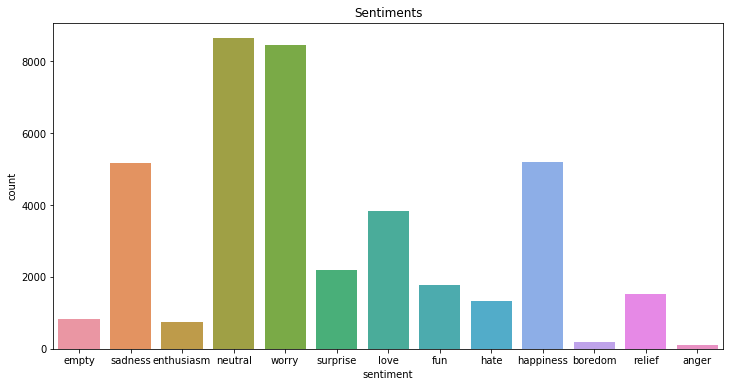

In [12]:
#verificar distribución de tweets
plt.figure(figsize=(12,6))
sns.countplot(df['sentiment'])
plt.title('Sentiments');

In [13]:
#Preparar vector objetivo: recodificar 'sentiment' de acuerdo a lo indicado
df['sentiment_bin'] = df['sentiment']

negative = ['empty', 'sadness', 'worry', 'hate', 'boredom', 'anger']
positive = ['enthusiasm', 'surprise', 'love', 'fun', 'happiness', 'relief']

for i in range (len(negative)):
    df['sentiment_bin'] = df['sentiment_bin'].replace(str(negative[i]), 'negative')
    
for i in range (len(positive)):
    df['sentiment_bin'] = df['sentiment_bin'].replace(str(positive[i]), 'positive')

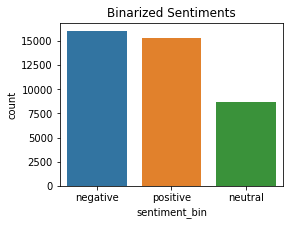

In [14]:
#verificar distribución de tweets
plt.figure(figsize=(4,3))
sns.countplot(df['sentiment_bin'])
plt.title('Binarized Sentiments');

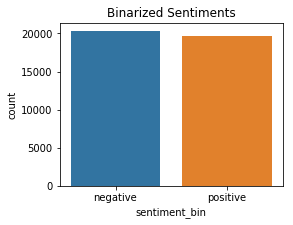

In [15]:
#En el caso de 'neutral', asignar 'positivo' o 'negativo' de forma aleatoria:
rand_choice = ['positive', 'negative']

for i in df[df['sentiment'] == 'neutral'].index:
    df['sentiment_bin'][i] = choice(rand_choice)

#verificar que asignación sí fue aleatoria
plt.figure(figsize=(4,3))
sns.countplot(df['sentiment_bin'])
plt.title('Binarized Sentiments');

In [16]:
df.sample(10)

sentiment           author  \
36027       love  IAMCANADIANFIRE   
27771      worry    LindseyJacobs   
38795    neutral       rgoodchild   
26710  happiness       SooSpecial   
25975      worry           genxyz   
16998      worry      deirdreryan   
28985    neutral     ItsLivBitchx   
9036       worry         Toni_GPB   
25628      worry            MoSH_   
11419    neutral   DolceDelicious   

                                                 content  \
36027  happy mother is day to all the mom is out ther...   
27771   for sure you should continue to tweet while o...   
38795   oh i know. and i aprreciate it  it can be my ...   
26710                                   i am comin wit u   
25975  monday mornin' back to work today. good thing ...   
16998   woohoo nothing says a hot date night than a s...   
28985       have you dissapeared to go on the ellen show   
9036                            i wish our did not close   
25628    there is finally time it is raining  and the...   
11419               salad from krogers...  i was hungry.   

                                               tokenized sentiment_bin  
36027  happy mother day mom happen greatest mom world...      positive  
27771   sure continue tweet conf call worrying cat bee .      negative  
38795                     oh know . aprreciate back plan      negative  
26710                                        comin wit u      positive  
25975  monday mornin ' back work today .good thing li...      negative  
16998  woohoo nothing say hot date night squeegee lol...      negative  
28985                          dissapeared go ellen show      positive  
9036                                          wish close      negative  
25628  finally time raining hockey start 4 good idea ...      negative  
11419                         salad krogers ... hungry .      positive

In [18]:
#Determinar la frecuencia de los tokens
t0 = time()
# instanciamos un objeto, con máximo 5000 palabras
#TfidfVectorizer permite dar mayor peso a palabras únicas (más repetidas, ej: 'the') tendrán menor peso!
tf_idf_vector=TfidfVectorizer(stop_words='english', max_features=10000)

# Implementamos los pasos fit y transform
content = df['tokenized']
tf_idf_vector_fit = tf_idf_vector.fit_transform(content)

# Extraemos tokens (palabras)
words = tf_idf_vector.get_feature_names()

# extraemos frecuencia
words_freq = tf_idf_vector_fit.toarray().sum(axis=0)
print("done in %0.3fs." % (time() - t0))

#check lo que guardó words_freq
df_freq = pd.DataFrame(words_freq, index=words, columns=['frequency']).sort_values(by='frequency', ascending=False)
df_freq.head()

done in 2.785s.


frequency
day    833.489473
good   620.326619
work   511.604027
happy  484.186742
like   481.469569